# Token and Type

Text로 이루어진 Data를 분석하기 위해서는, 분석의 최소 단위가 무엇인지 결정해야 한다. 이 최소 단위를 type이라고 하고, 주어진 텍스트를 이 type으로 나눈 것을 token이라고 한다. 



In [49]:
corpus_path = "../data/DYBG_tn.txt"
corpus = open( corpus_path, 'r', encoding="utf-8").read().split()

In [52]:
# 雜病篇卷之四 > 內傷 > 勞倦傷治法 > 補中益氣湯 1.17.1
# https://mediclassics.kr/books/8/volume/12#content_267
data1 = "治勞役太甚或飮食失節身熱而煩自汗倦怠黃芪 一錢半人參白朮甘草各一錢當歸身陳皮各五分升麻柴胡各三分右剉作一貼水煎服"

ct = CohesionTokenizer()
ct.fit( corpus )
seg = ct.transform( [data1] )


In [53]:
seg

[' 治勞  役太甚或飮食失節  身熱  而煩  自汗  倦怠  黃芪   一錢 半 人參  白朮  甘草  各一錢  當歸 身 陳皮  各五分  升麻  柴胡  各三  分右  剉作一貼 水 煎服 ']

## Data

자료는 한국전통지식포털에 실려 있는 전통의학처방 19171 건을 사용하였다. 

In [1]:
from collections import Counter
import numpy as np
import pandas as pd

In [2]:
corpus_path = "../data/formulas.txt"
corpus_ = open( corpus_path, 'r', encoding='utf-8' ).read()
header, corpus_raw = corpus_.split("***")
corpus_raw = corpus_raw.strip()
corpus = [ line.strip() for line in corpus_raw.split("\n") ]
corpus_tokenized = [ line.split() for line in corpus ]

print( "# Corpus Description" )
print( header.strip() )
print()
print( "# Corpus Size: ", len(corpus) )


# Corpus Description
- 출처 : 한국전통지식포탈(www.koreantk.com) > 전통의료 > 처방
- 특징 : 본초 구성만 추출한 데이터
- 데이터 생성일 : 2016.01.16

# Corpus Size:  19162


## Data Overview

In [3]:
size_per_doc = [ len( doc ) for doc in corpus_tokenized ]
all_tokens = sum( corpus_tokenized, [] )
type_with_count_ = Counter( all_tokens )
type_with_count = type_with_count_.items()
count_per_type = list( type_with_count_.values() )

In [4]:
n_of_token = len( all_tokens )
n_of_type = len( type_with_count )
type_freq1 = [ t_ for t_, f_ in type_with_count if f_ == 1 ]
hapax = len( type_freq1 )

In [5]:
print( "# Report for Corpus")
print() 
print( "## Doc Size")
print( "* Max of Doc Size:", max( size_per_doc ) )
print( "* Min of Doc Size:", min( size_per_doc ) )
print( "* Mean of Doc Size: {:.3f}".format( np.mean( size_per_doc ) ) )
print( "* Median of Doc Size: {:.3f}".format( np.median( size_per_doc ) ) )
print() 
print( "## Token and Type")
print( "* N of Token:", n_of_token )
print( "* N of Type:", n_of_type )
print( "* Token/Type: {:.3f}".format( n_of_token /  n_of_type ) )
print( "* hapax: {} ( {:.3f}% )".format( hapax, hapax / n_of_token * 100 ) )
print( "  ----------------------" )
print( "* Max of Type Frequency:", max( count_per_type ) )
print( "* Min of Type Frequency:", min( count_per_type ) )
print( "* Mean of Type Frequency: {:.3f}".format( np.mean( count_per_type ) ) )
print( "* Median of Type Frequency: {:.3f}".format( np.median( count_per_type ) ) )

# Report for Corpus

## Doc Size
* Max of Doc Size: 59
* Min of Doc Size: 1
* Mean of Doc Size: 7.316
* Median of Doc Size: 6.000

## Token and Type
* N of Token: 140198
* N of Type: 1842
* Token/Type: 76.112
* hapax: 388 ( 0.277% )
  ----------------------
* Max of Type Frequency: 7372
* Min of Type Frequency: 1
* Mean of Type Frequency: 76.112
* Median of Type Frequency: 6.000


In [6]:
topn = 20
most_freq_top = type_with_count_.most_common( topn )
type_, freq_ = zip( *most_freq_top )
print( "# Most Frequency Tokens ( TOP {} )".format(topn) )
pd.DataFrame( {"1.Token": type_, "2.Frequency": freq_ } )

# Most Frequency Tokens ( TOP 20 )


,1.Token,2.Frequency
0,감초,7372
1,당귀,3834
2,인삼,3810
3,백출,3137
4,진피,2989
5,천궁,2701
6,반하,2340
7,황금,2052
8,백복령,1990
9,방풍,1943


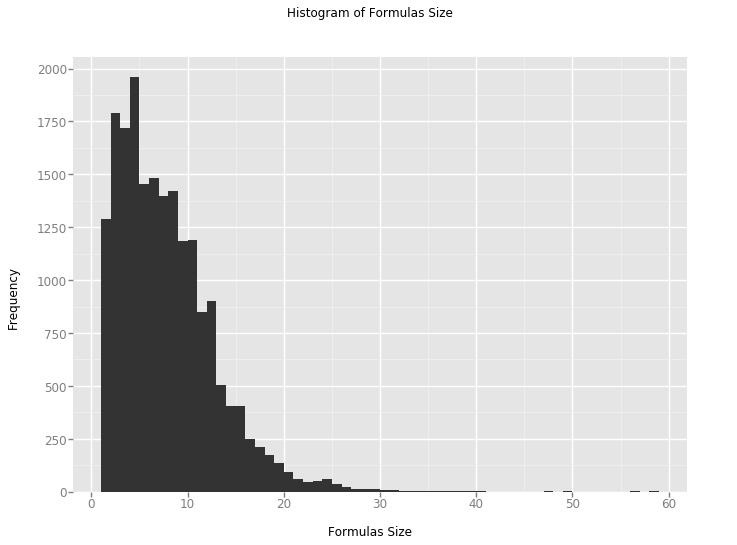

<ggplot: (-9223371926589008447)>

In [29]:
# ggplot
from ggplot import *

doc_size_dist = pd.DataFrame(data={'size': size_per_doc })
p1 = ggplot( aes(x='size'), data=doc_size_dist ) + geom_histogram(binwidth=1) 
p1 + labs(title="Histogram of Formulas Size") + xlab('Formulas Size') + ylab('Frequency')

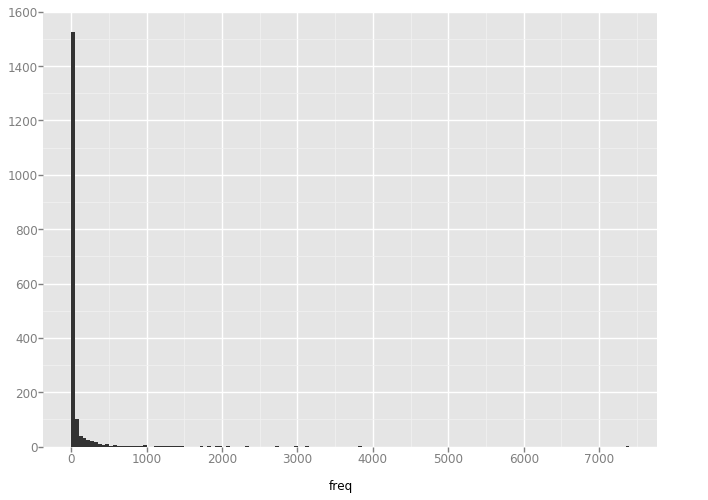

<ggplot: (-9223371926589028471)>

In [25]:
type_freq_dist = pd.DataFrame(data={'freq': count_per_type })
p2 = ggplot( aes(x='freq'), data=type_freq_dist ) + geom_histogram(binwidth=50)
p2 + labs(title="Histogram of Herbs Count") + xlab('Herbs Count') + ylab('Frequency')